# C++的常用算法

# 1. 概述

① 算法主要是由头文件$<algorithm>$、$<functional>$、$<numeric>$组成。

② $<algorithm>$是所有STL头文件中最大的一个，范围涉及到比较、交换、查找、遍历操作、复制、修改等等。

③ $<numeric>$体积很小，只包含几个在序列上面进行简单数学运算的模板函数。

④ $<functional>$定义了一些模板类，用以声明函数对象。

## 1.1 常用遍历算法

### 1.1.1 算法简介

① for_each //遍历容器

② transform //搬运容器到另一个容器中

### 1.1.2 for_each遍历算法

① for_each在实际开发中是最常用遍历算法，需要熟练掌握。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>

//普通函数
void print01(int val)
{
    cout << val << " ";
}

//仿函数
class print02
{
public:
    void operator()(int val)
    {
        cout << val << " ";
    }
};

void test01()
{
    vector<int>v;

    for (int i = 0; i < 10; i++)
    {
        v.push_back(i);
    }

    for_each(v.begin(), v.end(), print01); //利用普通函数实现遍历操作,放入函数名即可
    cout << endl;

    for_each(v.begin(), v.end(), print02()); //仿函数，放入匿名函数对象即可
    cout << endl;
    
}


int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：  
 - 0 1 2 3 4 5 6 7 8 9
 - 0 1 2 3 4 5 6 7 8 9
 - 请按任意键继续. . .

### 1.1.3 transform遍历算法

① 功能描述：搬运容器到另一个容器中。

② 函数原型：transform(iterator beg1, iterator end1, iterator beg2, _func);

1. beg1 源容器开始迭代器
2. end1 源容器结束迭代器
3. beg2 目标容器开始迭代器
4. _func 函数或者函数对象

③ 搬运的目标容器必须要提前开辟空间，否则无法正常搬运。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>

//常用遍历算法 transform

class Transform
{
public:
    int operator()(int v)
    {
        return v;
    }
};

class MyPrint
{
public:
    void operator()(int val)
    {
        cout << val+100 << " ";
    }
};

void test01()
{
    vector<int>v;
    for (int i = 0; i < 10; i++)
    {
        v.push_back(i);
    }
    vector<int>vTarget;  //目标容器
    vTarget.resize(v.size());  //目标容器，需要提前开辟空间

    transform(v.begin(), v.end(), vTarget.begin(), Transform());
    
    for_each(vTarget.begin(), vTarget.end(), MyPrint());
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：  
 - 100 101 102 103 104 105 106 107 108 109
 - 请按任意键继续. . .

## 1.2 常用查找算法

### 1.2.1 算法简介

① find //查找元素

② find_if //按条件查找元素

③ adjacent_find //查找相邻重复元素

④ binary_search //二分查找法

⑤ cout //统计元素个数

⑥ count_if //按条件统计元素个数

### 1.2.2 find 查找算法

① 功能描述：查找指定元素，找到返回指定元素的迭代器，找不到返回迭代器end()

② 函数原型：find(operator beg,iterator end, value);

1. 按值查找元素，找到返回指定位置迭代器，找不到返回结束位置迭代器位置。
2. beg 开始迭代器
3. end 结束迭代器
4. value 查找的元素

③ 利用find可以坐在容器这种找指定的元素，返回值是迭代器。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>

//查找 内置数据类型
void test01()
{
    vector<int>v;
    for (int i = 0; i < 10; i++)
    {
        v.push_back(i);
    }

    //查找 容器中 是否有 5 这个元素
    vector<int>::iterator it = find(v.begin(), v.end(), 5);
    if (it == v.end())
    {
        cout << "没有找到！" << endl;
    }
    else
    {
        cout << "找到：" << *it << endl;
    }
}

class Person 
{
public:
    Person(string name, int age)
    {
        this->m_Name = name;
        this->m_Age = age;
    }

    //重载 == 让find底层知道如何对比person数据类型
    bool operator==(const Person& p)
    {
        if (this->m_Name == p.m_Name && this->m_Age == p.m_Age)
        {
            return true;
        }
        else
        {
            return false;
        }
    }

    string m_Name;
    int m_Age;
};

//查找 自定义数据类型
void test02()
{
    vector<Person>v;
    //创建数据
    Person p1("aaa", 10);
    Person p2("bbb", 20);
    Person p3("ccc", 30);
    Person p4("ddd", 40);

    //放入到容器中
    v.push_back(p1);
    v.push_back(p2);
    v.push_back(p3);
    v.push_back(p4);

    Person pp("bbb",20);

    vector<Person>::iterator it = find(v.begin(), v.end(), pp); //find找里面有没有pp这个对象
    if (it == v.end())
    {
        cout << "没有找到" << endl;
    }
    else
    {
        cout << "找到元素姓名：" << it->m_Name << " 年龄：" << it->m_Age <<endl;
    }
}

int main() 
{
    test01();

    test02();

    system("pause");

    return 0;
}

运行结果:  
 - 找到：5
 - 找到元素姓名：bbb 年龄：20
 - 请按任意键继续. . .

### 1.2.3 find_if 查找算法

① 功能描述：按条件查找

② 函数原型：find_if(iterator beg, iterator end, _Pred);

1. 按值查找元素，找到返回指定位置迭代器，找不到返回结束迭代器位置。
2. beg 开始迭代器
3. end 结束迭代器
4. _Pred 函数或者谓词 (返回bool类型的仿函数)

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>

//1、查找 内置数据类型

class GreaterFive
{
public:
    bool operator()(int val)
    {
        return val > 5;  //当val大于5时，返回真
    }
};

void test01()
{
    vector<int>v;
    for (int i = 0; i < 10; i++)
    {
        v.push_back(i);
    }
    vector<int>::iterator it = find_if(v.begin(), v.end(), GreaterFive());

    if (it == v.end())
    {
        cout << "没有找到";
    }
    else
    {
        cout << "找到大于5的数字为：" << *it << endl;
    }
}

//查找 自定义数据类型

class Person 
{
public:
    Person(string name, int age)
    {
        this->m_Name = name;
        this->m_Age = age;
    }
    string m_Name;
    int m_Age;
};

class Greater20
{
public:
    bool operator()(Person& p)
    {
        return p.m_Age > 20;
    }
};

void test02()
{
    vector<Person>v;

    //创建数据
    Person p1("aaa", 10);
    Person p2("bbb", 20);
    Person p3("ccc", 30);
    Person p4("ddd", 40);

    v.push_back(p1);
    v.push_back(p2);
    v.push_back(p3);
    v.push_back(p4);

    //找年龄大于20的人
    vector<Person>::iterator it = find_if(v.begin(), v.end(), Greater20());

    if (it == v.end())
    {
        cout << "没有找到" << endl;
    }
    else
    {
        cout << "找到姓名：" << it->m_Name << " 年龄：" << it->m_Age << endl;
    }
}

int main() {

    test01();

    test02();

    system("pause");

    return 0;

}

运行结果：
 - 找到大于5的数字为：6
 - 找到姓名：ccc 年龄：30
 - 请按任意键继续. . .

### 1.2.4 adjacent_find 查找算法

① 功能描述：查找相邻重复元素

② 函数原型：adjacent_find(iterator beg, iterator end);

1. 查找相邻重复元素，返回相邻元素的第一个位置的迭代器
2. beg 开始迭代器
3. end 结束迭代器

③ 面试题中如果出现查找相邻重复元素，记得用STL中的adjacent_find算法

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>

void test01()
{
    vector<int>v;
    v.push_back(0);
    v.push_back(2);
    v.push_back(0);
    v.push_back(3);
    v.push_back(1);
    v.push_back(4);
    v.push_back(3); //相邻，3重复，adjacent_find()返回的是这个，第一个元素的迭代器
    v.push_back(3);  

    vector<int>::iterator pos = adjacent_find(v.begin(), v.end());

    if (pos == v.end())
    {
        cout << "没有找到相邻重复元素";
    }
    else
    {
        cout << "找到相邻重复元素：" << *pos << endl;
    }
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 找到相邻重复元素：3
 - 请按任意键继续. . .

### 1.2.5 binary_search 查找算法

① 功能描述：查找指定元素是否存在。

② 函数原型：bool binary_search(iterator beg, iterator end, value);

1. 查找指定的元素，查到返回true，否则false
2. 注意：在无序序列中不可用
3. --beg 开始迭代器
4. --end 结束迭代器
5. --value 查找迭代器

③ 二分法查找效率很高，值得注意的是查找的容器中元素必须是有序序列。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>

//常用查找算法 binary_search
void test01()
{
    vector<int>v;
    for (int i = 0; i < 10; i++)
    {
        v.push_back(i);
    }

    //查找容器中是否有9元素
    //注意：容器必须是有序的序列，上面的vector是一个升序的序列，如果vector是一个无序的序列，那么有可能找到，有可能找不到
    bool ret = binary_search(v.begin(), v.end(),9);

    if (ret)
    {
        cout << "找到元素" << endl;
    }
    else
    {
        cout << "没有找到元素：" << endl;
    }

    vector<int>v2;
    for (int i = 0; i < 10; i++)
    {
        v2.push_back(i);
    }
    v2.push_back(2);  //又插入了一个元素，vector变成无序序列了，那么结果就是未知的了
    bool ret2 = binary_search(v2.begin(), v2.end(), 9);

    if (ret2)
    {
        cout << "找到元素";
    }
    else
    {
        cout << "没有找到元素" << endl;
    }
}


int main() {

    test01();

    system("pause");

    return 0;

}

运行结果： 
 - 找到元素
 - 没有找到元素
 - 请按任意键继续. . .

### 1.2.6 count 查找算法

① 功能描述：统计元素个数。

② 函数原型：count(iterator big, iterator end, value);

1. 统计元素出现次数
2. beg 开始迭代器
3. end 结束迭代器
4. value 统计的元素

③ 统计自定义数据类型时候，需要配合重载operator==

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>

//1、统计内置数据类型

void test01()
{
    vector<int>v;
    v.push_back(10);
    v.push_back(40);
    v.push_back(30);
    v.push_back(40);
    v.push_back(20);
    v.push_back(40);

    int num = count(v.begin(), v.end(), 40);

    cout << "40的元素个数为：" << num << endl;
}

//2、统计自定义数据类型

class Person
{
public:
    Person(string name, int age)
    {
        this->m_Name = name;
        this->m_Age = age;
    }

    // 重载==
    bool operator==(const Person& p)
    {
        if (this->m_Age == p.m_Age)
        {
            return true;
        }
        else
        {
            return false;
        }
    }
    string m_Name;
    int m_Age;
};

void test02()
{
    vector<Person>v;
    Person p1("刘备", 35);
    Person p2("关羽", 35);
    Person p3("张飞", 35);
    Person p4("赵云", 30);
    Person p5("曹操", 40);
    
    //将人员插入到容器中
    v.push_back(p1);
    v.push_back(p2);
    v.push_back(p3);
    v.push_back(p4);
    v.push_back(p5);

    Person p("诸葛亮", 35);

    int num = count(v.begin(), v.end(), p);

    cout << "和诸葛亮同岁数的人有多少：" << num << endl;
}

int main() 
{
    test01();

    test02();

    system("pause");

    return 0;
}

运行结果： 
 - 40的元素个数为：3
 - 和诸葛亮同岁数的人有多少：3
 - 请按任意键继续. . .

### 1.2.7 count_if 查找算法

① 功能描述：按条件统计元素个数。

② 函数原型：count_if(iterator beg, iterator end, _Pred)

1. 按条件统计元素出现次数
2. beg 开始迭代器
3. end 结束迭代器
4. _Pred 谓词

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>

//1、统计内置数据类型

class Greater20
{
public:
    bool operator()(int val)
    {
        return val > 20;
    }
};
void test01()
{
    vector<int>v;
    v.push_back(10);
    v.push_back(40);
    v.push_back(30);
    v.push_back(20);
    v.push_back(40);

    int num = count_if(v.begin(), v.end(), Greater20());

    cout << "在容器中大于20的元素个数为：" << num << endl;
}

//2、统计自定义数据类型

class Person
{
public:
    Person(string name, int age)
    {
        this->m_Name = name;
        this->m_Age = age;
    }
    string m_Name;
    int m_Age;
};

class AgeGreater20
{
public:
    bool operator()(const Person &p)
    {
        return p.m_Age > 20;
    }
};

void test02()
{
    vector<Person>v;
    Person p1("刘备", 35);
    Person p2("关羽", 35);
    Person p3("张飞", 35);
    Person p4("赵云", 40);
    Person p5("曹操", 20);
    
    //将人员插入到容器中
    v.push_back(p1);
    v.push_back(p2);
    v.push_back(p3);
    v.push_back(p4);
    v.push_back(p5);

    //统计 大于20岁人员个数

    int num = count_if(v.begin(), v.end(), AgeGreater20());

    cout << "大于20岁的人员个数为：" << num << endl;
}

int main() {

    test01();

    //test02();

    system("pause");

    return 0;

}

运行结果：  
 - 在容器中大于20的元素个数为：3
 - 请按任意键继续. . .

## 1.3 常用排序算法

### 1.3.1 算法简介

① sort //对容器内元素进行排序

② random_shuffle //洗牌 指定范围内的元素随机调整次序

③ merge //容器元素合并，并存储到另一容器中

④ reverse //反转指定范围的元素

### 1.3.2 sort排序算法

① 功能描述：对容器内元素进行排序

② 函数原型：sort(iterator beg, iterator end, _Pred);

1. 按值查找元素，找到返回指定位置迭代器，找不到返回结束位置迭代器位置
2. beg 开始迭代器
3. end 结束迭代器
4. _Pred 谓词

③ sort属于开发中最常用的算法之一，需熟练掌握。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>

//1、统计内置数据类型

//普通函数
void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v;
    v.push_back(10);
    v.push_back(30);
    v.push_back(50);
    v.push_back(20);
    v.push_back(40);

    //利用sort升序
    sort(v.begin(), v.end()); //默认是升序排列
    for_each(v.begin(), v.end(), myPrint);
    cout << endl;

    //改变为降序
    sort(v.begin(), v.end(), greater<int>());
    for_each(v.begin(), v.end(), myPrint);
    cout << endl;
}

//2、统计自定义数据类型

class Person
{
public:
    Person(string name, int age)
    {
        this->m_Name = name;
        this->m_Age = age;
    }
    string m_Name;
    int m_Age;
};

class AgeGreater20
{
public:
    bool operator()(const Person &p)
    {
        return p.m_Age > 20;
    }
};

void test02()
{
    vector<Person>v;
    Person p1("刘备", 35);
    Person p2("关羽", 35);
    Person p3("张飞", 35);
    Person p4("赵云", 40);
    Person p5("曹操", 20);
    
    //将人员插入到容器中
    v.push_back(p1);
    v.push_back(p2);
    v.push_back(p3);
    v.push_back(p4);
    v.push_back(p5);

    //统计 大于20岁人员个数
    
    int num = count_if(v.begin(), v.end(), AgeGreater20());

    cout << "大于20岁的人员个数为：" << num << endl;
}

int main() {

    test01();

    //test02();

    system("pause");

    return 0;

}

运行结果：
 - 10 20 30 40 50
 - 50 40 30 20 10
 - 请按任意键继续. . .

### 1.3.3 random_shuffle排序算法

① 功能描述：洗牌算法指定范围内的元素随机调整次序。

② 函数原型：random_shuffle(iterator beg, iterator end);

1. 指定范围内的元素随机调整次序
2. beg 开始迭代器
3. end 结束迭代器

③ random_shuffle洗牌算法比较实用，使用时记得加随机数种子。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>
#include<ctime>

class myPrint
{
public:
    void operator()(int val)
    {
        cout << val << " ";
    }
};

void test01()
{
    srand((unsigned int)time(NULL));  //生成一个随机数种子，利用时间生成，确保每次生成的随机数种子不同

    vector<int>v;
    for (int i = 0; i < 10; i++)
    {
        v.push_back(i);
    }
    //利用洗牌 算法 打乱顺序
    random_shuffle(v.begin(), v.end());

    for_each(v.begin(), v.end(),myPrint());
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 1 5 7 9 4 2 6 8 3 0
 - 请按任意键继续. . .

### 1.3.4 merge排序算法

① 功能描述：两个容器元素合并，并存储到另一容器中。

② 函数原型：merge(iterator beg1, iterator end1, iterator beg2, iterator end2, iterator dest);

1. 容器元素合并，并存储到另一容器中
2. 注意：两个容器必须是有序的
3. beg1 容器1开始迭代器
4. end2 容器1结束迭代器
5. beg2 容器2开始迭代器
6. end2 容器2结束迭代器
7. dest 目标容器开始迭代器

③ merge合并后的容器也是有序的

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>
#include<ctime>

void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v1;
    vector<int>v2;

    for (int i = 0; i < 10; i++)
    {
        v1.push_back(i);
        v2.push_back(i + 1);
    }

    //目标容器
    vector<int>vTarget;
    vTarget.resize(v1.size() + v2.size());  //提前给目标容器分配空间
    
    merge(v1.begin(), v1.end(), v2.begin(), v2.end(), vTarget.begin());
    for_each(vTarget.begin(), vTarget.end(), myPrint);
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10
 - 请按任意键继续. . .

### 1.3.5 reverse排序算法

① 功能描述：将容器内元素进行反转

② 函数原型：reverse(iterator beg, iterator end);

1. 反转指定范围的元素
2. beg 开始迭代器
3. end 结束迭代器

③ reverse反转区间内的元素，面试题可能涉及到

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>
#include<ctime>


void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v1;
    v1.push_back(10);
    v1.push_back(30);
    v1.push_back(50);
    v1.push_back(20);
    v1.push_back(40);

    cout << "反转前：" << endl;
    for_each(v1.begin(), v1.end(), myPrint);
    cout << endl;

    cout << "反转后：" << endl;
    reverse(v1.begin(), v1.end());
    for_each(v1.begin(), v1.end(), myPrint);
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 反转前：
 - 10 30 50 20 40
 - 反转后：
 - 40 20 50 30 10
 - 请按任意键继续. . .

## 1.4 常用的拷贝和替换算法

### 1.4.1 算法简介

① 算法简介：

1. copy //容器内指定范围的元素拷贝到另一容器中
2. replace //将容器内指定范围的旧元素修改为新元素
3. replace_if //容器内指定范围满足条件的元素替换为新元素
4. swap //互换两个容器的元素

### 1.4.2 copy算法

① 功能描述：容器内指定范围的元素拷贝到另一容器中。

② 函数原型：copy(iterator beg, iterator end, iterator dest);

1. 按值查找元素，找到返回指定位置迭代器，找不到返回结束迭代器位置
2. beg 开始迭代器
3. end 结束迭代器
4. dest 目标起始迭代器

③ 利用copy算法在拷贝时，目标容器记得提前开辟空间。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>

void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v1;
    for (int i = 0; i < 10; i++)
    {
        v1.push_back(i);
    }
    vector<int>v2;
    v2.resize(v1.size());
    copy(v1.begin(),v1.end(),v2.begin());

    for_each(v2.begin(), v2.end(), myPrint);
    cout << endl;
}

int main() {

    test01();

    system("pause");

    return 0;

}

运行结果：
 - 0 1 2 3 4 5 6 7 8 9
 - 请按任意键继续. . .

### 1.4.3 replace算法

① 功能描述：将容器内指定范围的旧元素修改为新元素。

② 函数原型：repalece(iterator beg, iterator end, oldvalue, newvalue);

1. 将区间内旧元素替换成新元素
2. beg 开始迭代器
3. end 结束迭代器
4. oldvalue 旧元素
5. newvalue 新元素

③ replace会替换区间内满足条件的元素。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>

class MyPrint
{
public:
    void operator()(int val)
    {
        cout << val << " ";
    }
};

void test01()
{
    vector<int>v1;
    for (int i = 0; i < 10; i++)
    {
        v1.push_back(i);
    }
    v1.push_back(20);
    v1.push_back(30);
    v1.push_back(50);
    v1.push_back(30);
    v1.push_back(40);
    v1.push_back(20);
    v1.push_back(10);
    v1.push_back(20);

    cout << "替换前：" << endl;
    for_each(v1.begin(), v1.end(), MyPrint());
    cout << endl;

    //将容器里面所有的20替换成2000
    replace(v1.begin(), v1.end(), 20, 20000);
    cout << "替换后：" << endl;
    for_each(v1.begin(), v1.end(), MyPrint());
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 替换前：
 - 0 1 2 3 4 5 6 7 8 9 20 30 50 30 40 20 10 20
 - 替换后：
 - 0 1 2 3 4 5 6 7 8 9 20000 30 50 30 40 20000 10 20000
 - 请按任意键继续. . .

### 1.4.4 replace_if算法

① 功能描述：将区间内满足条件的元素，替换成指定元素。

② 函数原型：replace_if(iterator beg, iterator end, _pred, newvalue);

1. 按条件替换元素，满足条件的替换成指定元素
2. beg 开始迭代器
3. end 结束迭代器
4. _pred 谓词
5. newvalue 替换的新元素

③ replace_if 按条件查找，可以利用仿函数灵活筛选满足的条件。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>

class MyPrint
{
public:
    void operator()(int val)
    {
        cout << val << " ";
    }
};

class Greater30
{
public:
    bool operator()(int val)
    {
        return val >= 30;
    }
};

void test01()
{
    vector<int>v1;
    v1.push_back(20);
    v1.push_back(30);
    v1.push_back(50);
    v1.push_back(30);
    v1.push_back(40);
    v1.push_back(20);
    v1.push_back(10);
    v1.push_back(20);

    cout << "替换前：" << endl;
    for_each(v1.begin(), v1.end(), MyPrint());
    cout << endl;

    //将容器里面大于等于30的 替换成30000
    replace_if(v1.begin(), v1.end(), Greater30(),30000);
    cout << "替换后：" << endl;
    for_each(v1.begin(), v1.end(), MyPrint());
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 替换前：
 - 20 30 50 30 40 20 10 20
 - 替换后：
 - 20 30000 30000 30000 30000 20 10 20
 - 请按任意键继续. . .

### 1.4.5 swap算法

① 功能描述：互换两个容器的元素。

② 函数原型：swap(container c1, container c2);

1. 互换两个容器的元素
2. c1容器1
3. c2容器2

③ swap交换容器时，注意交换的容器要同种类型。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<algorithm>
#include<string>
#include<functional>

class MyPrint
{
public:
    void operator()(int val)
    {
        cout << val << " ";
    }
};

class Greater30
{
public:
    bool operator()(int val)
    {
        return val >= 30;
    }
};

void test01()
{
    vector<int>v1;
    vector<int>v2;
    for (int i = 0; i < 10; i++)
    {
        v1.push_back(i);
        v2.push_back(i + 100);
    }

    cout << "交换前：" << endl;
    for_each(v1.begin(), v1.end(), MyPrint());
    cout << endl;
    for_each(v2.begin(), v2.end(), MyPrint());
    cout << endl;

    swap(v1,v2);
    cout << "交换后：" << endl;
    for_each(v1.begin(), v1.end(), MyPrint());
    cout << endl;
    for_each(v2.begin(), v2.end(), MyPrint());
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 交换前：
 - 0 1 2 3 4 5 6 7 8 9
 - 100 101 102 103 104 105 106 107 108 109
 - 交换后：
 - 100 101 102 103 104 105 106 107 108 109
 - 0 1 2 3 4 5 6 7 8 9
 - 请按任意键继续. . .

## 1.5 常用的算术生成算法

### 1.5.1 算法简介

① 算术生成算法属于小型算法，使用时包含的头文件为 #include $<numeric>$

② 算法简介：

1. accumulate //计算容器元素累积总和
2. fill //向容器中添加元素

### 1.5.2 accumulate生成算法

① 计算区间内 容器元素累加总和。

② 函数原型：accumulate(iterator beg, iterator end, value);

1. 计算容器元素累加总和
2. beg 开始迭代器
3. end 结束迭代器
4. value 起始值

③ accumulate使用时，头文件注意是numeric，这个算法很实用。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<numeric>

void test01()
{
    vector<int>v1;
    for (int i = 0; i <= 100; i++)
    {
        v1.push_back(i);
    }

    int total1 = accumulate(v1.begin(), v1.end(), 0);  //起始累加值为0
    int total2 = accumulate(v1.begin(), v1.end(), 10000); //5050加上10000
    cout << "total1 = " << total1 << endl;
    cout << "total2 = " << total2 << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - total1 = 5050
 - total2 = 15050
 - 请按任意键继续. . .

### 1.5.3 fill生成算法

① 功能描述：向容器中填充指定的元素。

② 函数原型：fill(iterator beg, iterator end, value);

1. 向容器中填充元素
2. beg 开始迭代器
3. end 结束迭代器
4. value 填充的值

③ 利用fill可以将容器区间内元素填充为指定值。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<numeric>
#include<algorithm>

void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v1;
    v1.resize(10);
    for_each(v1.begin(), v1.end(), myPrint);
    cout << endl;
    
    //后期重新填充
    fill(v1.begin(), v1.end(), 100);
    for_each(v1.begin(), v1.end(), myPrint);
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 0 0 0 0 0 0 0 0 0 0
 - 100 100 100 100 100 100 100 100 100 100
 - 请按任意键继续. . .

## 1.6 常用集合算法

### 1.6.1 算法简介

① set_itersection //求两个容器的交集

② set_union //求两个容器的并集

③ set_difference // 求两个容器的差集

### 1.6.2 set_intersection算法

① 功能描述：求两个容器的交集。

② 函数原型：set_intersection(iterator beg1, iterator end1, iterator beg2, iterator end2, iterator dest);

1. 求两个集合的交集
2. 注意：两个集合必须是有序序列
3. beg1 容器1 开始迭代器
4. end1 容器1 结束迭代器
5. beg2 容器2 开始迭代器
6. end2 容器2 结束迭代器
7. dest 目标容器开始迭代器

③ 求交集的两个集合必须都是有序序列。

④ 目标容器开辟空间需要从两个容器中取小值。

⑤ set_intersection返回值是交集中最后一个元素的位置。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<numeric>
#include<algorithm>

void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v1;
    vector<int>v2;
    for (int i = 0; i < 10; i++)
    {
        v1.push_back(i); //0~9
        v2.push_back(i + 5); //5~14
    }
    vector<int>vTarget;
    //目标容器需要提前开辟空间
    //最特殊情况 大容器包含小容器  开辟空间 取小容器的size即可
    vTarget.resize(min(v1.size(), v2.size()));

    //获取交集
    vector<int>::iterator itEnd = set_intersection(v1.begin(), v1.end(), v2.begin(), v2.end(), vTarget.begin());
    for_each(vTarget.begin(), vTarget.end(), myPrint); //取交集的元素少于开辟的容量，空的部分用0补充了
    cout << endl;
    for_each(vTarget.begin(), itEnd, myPrint); //itEnd为取交集的最后一个元素的迭代器进行返回
    cout << endl;
}

int main() {

    test01();

    system("pause");

    return 0;

}

运行结果： 
 - 5 6 7 8 9 0 0 0 0 0
 - 5 6 7 8 9
 - 请按任意键继续. . .

### 1.6.3 set_union集合算法

① 功能描述：求两个集合的并集。

② 函数原型：set_union(iterator beg1, iterator end1, iterator beg2, iterator end2, iterator dest);

1. 求两个集合的并集。
2. 注意：两个集合必须是有序序列。
3. beg1 容器1 开始迭代器
4. end1 容器1 结束迭代器
5. beg2 容器2 开始迭代器
6. end2 容器2 结束迭代器
7. dest 目标容器开始迭代器

③ 求并集的两个集合必须得是有序序列。

④ 目标容器开辟空间需要两个容器相加。

⑤ set_union返回值是并集中最后一个元素的为真。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<numeric>
#include<algorithm>

void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v1;
    vector<int>v2;
    for (int i = 0; i < 10; i++)
    {
        v1.push_back(i); //0~9
        v2.push_back(i + 5); //5~14
    }
    vector<int>vTarget;
    //目标容器需要提前开辟空间
    //最特殊情况 两个容器没有交集，并集就是两个容器size相加
    vTarget.resize(v1.size()+v2.size());

    //获取交集
    vector<int>::iterator itEnd = set_union(v1.begin(), v1.end(), v2.begin(), v2.end(), vTarget.begin());
    for_each(vTarget.begin(), vTarget.end(), myPrint); //用最特殊的情况开辟的内存，由于一共有20个数，开辟了20个内存，并集后多余的位置为0
    cout << endl;
    for_each(vTarget.begin(), itEnd, myPrint); //itEnd为取并集后返回的最后一个元素的迭代器进行返回
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 0 0 0 0 0
 - 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
 - 请按任意键继续. . .

### 1.6.4 set_difference集合算法

① 功能描述：求两个集合的差集

② 函数原型：set_difference(iterator beg1, iterator end1, iterator beg2, iterator end2, iterator dest);

1. 求两个集合的差集
2. 注意：两个集合必须是有序序列
3. beg1 容器1 开始迭代器
4. end1 容器1 结束迭代器
5. beg2 容器2 开始迭代器
6. end2 容器2 结束迭代器
7. dest 目标容器开始迭代器

③ 当集合前后顺序不同时，集合的差集不一样，如下图所示，V1与V2的差集、V2与V1的差集，是不一样的。

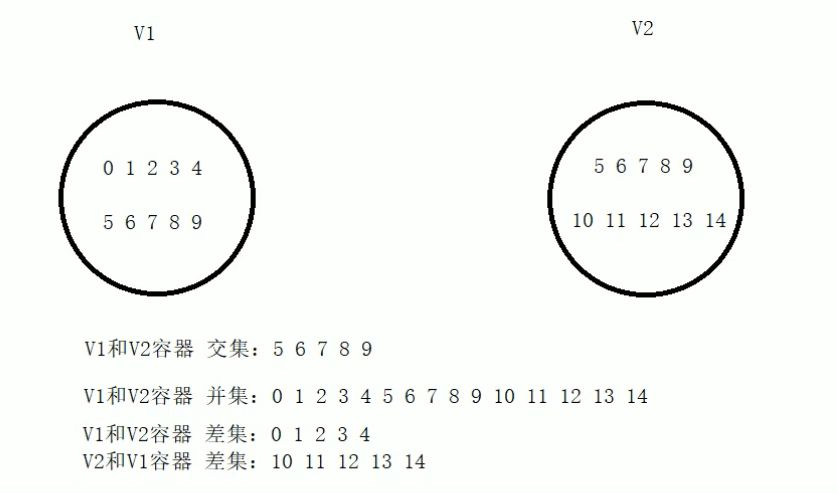

④ 求差集的两个集合必须是有序序列。

⑤ 目标容器的开辟空间需要从两个容器取较大值。

⑥ set_difference返回值是差集中最后一个元素的位置。

In [ ]:
#include<iostream>
using namespace std;
#include<vector>
#include<numeric>
#include<algorithm>

void myPrint(int val)
{
    cout << val << " ";
}

void test01()
{
    vector<int>v1;
    vector<int>v2;
    for (int i = 0; i < 10; i++)
    {
        v1.push_back(i); //0~9
        v2.push_back(i + 5); //5~14
    }
    vector<int>vTarget;
    //目标容器需要提前开辟空间
    //最特殊情况 两个容器没有交集，取两个容器中大的size作为目标容器开辟空间
    vTarget.resize(max(v1.size(),v2.size()));

    cout << "v1和v2的差集为：" << endl;
    vector<int>::iterator itEnd = set_difference(v1.begin(), v1.end(), v2.begin(), v2.end(), vTarget.begin());
    for_each(vTarget.begin(), vTarget.end(), myPrint); 
    cout << endl;
    for_each(vTarget.begin(), itEnd, myPrint); 
    cout << endl;

    cout << "v2和v1的差集为：" << endl;
    itEnd = set_difference(v2.begin(), v2.end(), v1.begin(), v1.end(), vTarget.begin());
    for_each(vTarget.begin(), vTarget.end(), myPrint);
    cout << endl;
    for_each(vTarget.begin(), itEnd, myPrint);
    cout << endl;
}

int main() 
{
    test01();

    system("pause");

    return 0;
}

运行结果：
 - v1和v2的差集为：
 - 0 1 2 3 4 0 0 0 0 0
 - 0 1 2 3 4
 - v2和v1的差集为：
 - 10 11 12 13 14 0 0 0 0 0
 - 10 11 12 13 14
 - 请按任意键继续. . .